# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [3]:
import pandas as pd

In [7]:
df = pd.read_csv("C:\\Users\\aliha\\Downloads\\customer_booking.csv", encoding="ISO-8859-1")

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [15]:
print(df)

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_

In [24]:
import pandas as pd

# Assuming you have a DataFrame named df with a column named "sales_channel_coded"

# Replace values in the column ("internet" with 1 and "mobile" with 0)
df["sales_channel_coded"] = df["sales_channel_coded"].replace({"Internet": 1, "Mobile": 0})


# Replace values in the column ("internet" with 1 and "mobile" with 0)
df["trip_type_coded"] = df["trip_type"].replace({"RoundTrip": 1, "CircleTrip": 0, "OneWay": 2})

In [22]:
df = df.drop('sales_channel_Mobile', axis=1)

In [25]:
# Print the modified DataFrame
print(df)

       num_passengers  trip_type  purchase_lead  length_of_stay  flight_hour  \
0                   2  RoundTrip            262              19            7   
1                   1  RoundTrip            112              20            3   
2                   2  RoundTrip            243              22           17   
3                   1  RoundTrip             96              31            4   
4                   2  RoundTrip             68              22           15   
...               ...        ...            ...             ...          ...   
49995               2  RoundTrip             27               6            9   
49996               1  RoundTrip            111               6            4   
49997               1  RoundTrip             24               6           22   
49998               1  RoundTrip             15               6           11   
49999               1  RoundTrip             19               6           10   

       flight_day   route booking_origi

# Linear Regression Analysis

## Overview
This explanation covers a linear regression analysis on a dataset. The analysis involves the following steps:

## Importing Libraries
- Necessary Python libraries are imported. These libraries include Pandas for data manipulation, scikit-learn's train_test_split for splitting the dataset, LinearRegression for creating a linear regression model, and mean_squared_error for evaluating model performance.

## Data Preparation
### Defining Independent and Dependent Variables
- In this section, the independent variables (features) are defined in the DataFrame X, and the dependent variable (target) is defined in the Series y. These variables are used to train and test the model.

## Data Splitting
- The dataset is split into two parts: training and testing sets. This is done to evaluate the model's performance. 80% of the data is allocated to the training set, and 20% is allocated to the testing set.

## Model Building
### Creating a Linear Regression Model
- A Linear Regression model is created and initialized. This model will be used to establish a relationship between the independent variables and the target variable.

### Fitting the Model
- The model is trained (fitted) using the training data. During this process, the model learns the coefficients and intercept that best fit the data.

## Model Evaluation
### Making Predictions
- After training, the model is used to make predictions on the test data, which is stored in y_pred.

### Calculating Mean Squared Error (MSE)
- The Mean Squared Error (MSE) is calculated to assess the accuracy of the model's predictions. Lower MSE values indicate better model performance.

### Printing Model Coefficients and Intercept
- The code prints the coefficients (weights) and the intercept of the linear regression model. These coefficients represent the impact of each feature on the target variable.

## Calculating R-squared (R2) Value
- The R-squared (R2) value is calculated to measure how well the model fits the data. R2 represents the proportion of variance in the target variable that is explained by the model. A higher R2 indicates a better-fitting model.


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define the independent variables (features) and the dependent variable (target)
X = df[["num_passengers", "trip_type_coded","length_of_stay","flight_hour","flight_day","wants_extra_baggage","wants_preferred_seat","wants_in_flight_meals","flight_duration","purchase_lead","sales_channel_coded"]]  # Add more features if needed
y = df["booking_complete"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

from sklearn.metrics import r2_score

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.12284290206960768
Coefficients: [ 5.25330087e-03 -3.95339968e-02 -4.86127833e-04  5.81871856e-04
 -9.18816538e-04  4.67331577e-02  3.40280877e-02  1.44646991e-02
 -2.52942106e-02 -6.44402812e-05  5.45361395e-02]
Intercept: 0.284472582838034
R-squared: 0.025798581480715677


# Visualizing the Impact of Features on Booking Completion

## Importing Matplotlib
In this section, we visualize the impact of each feature on the "booking_complete" target variable using a horizontal bar plot.

```python
import matplotlib.pyplot as plt


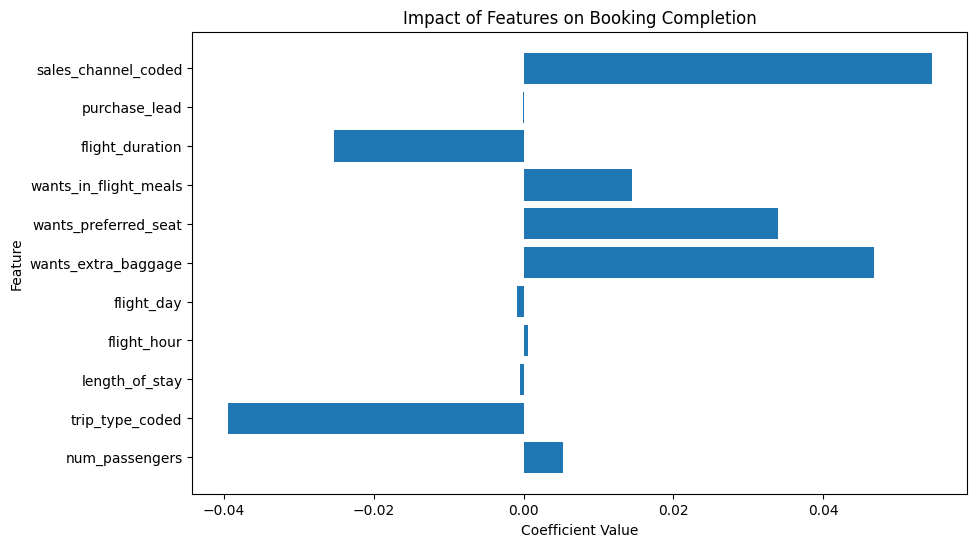

In [35]:
import matplotlib.pyplot as plt

# Get the feature names
feature_names = X.columns

# Get the coefficients from the model
coefficients = model.coef_

# Create a bar plot to show the impact of each feature
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Impact of Features on Booking Completion")
plt.show()


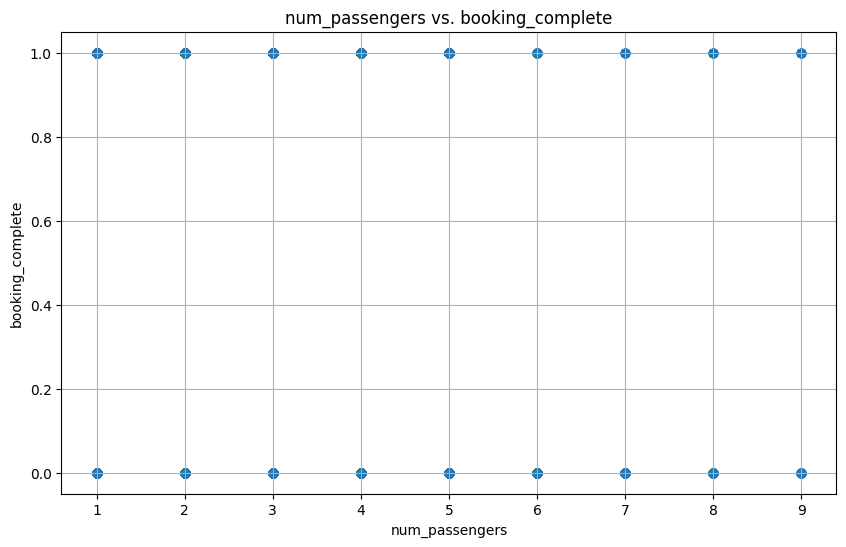

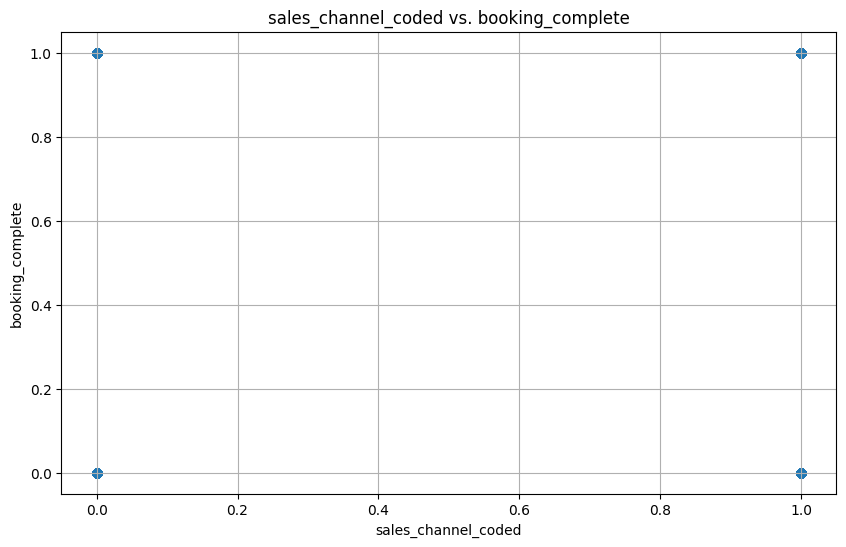

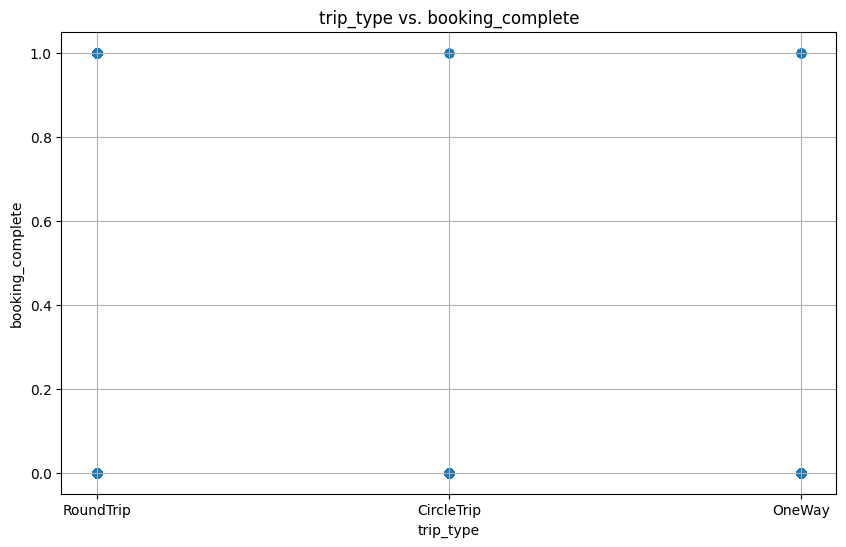

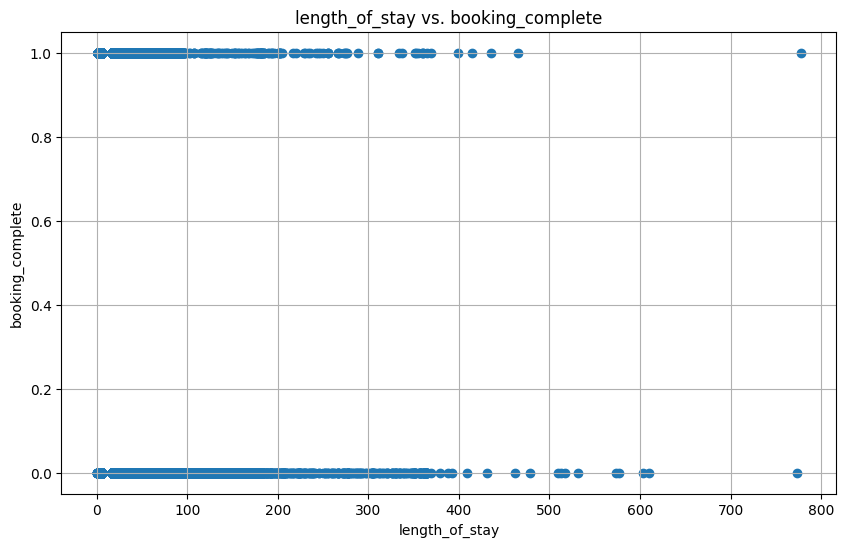

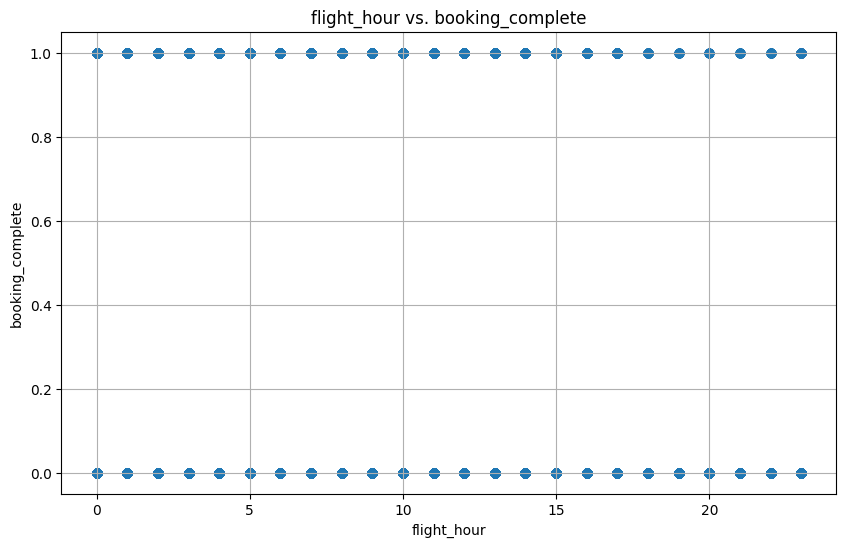

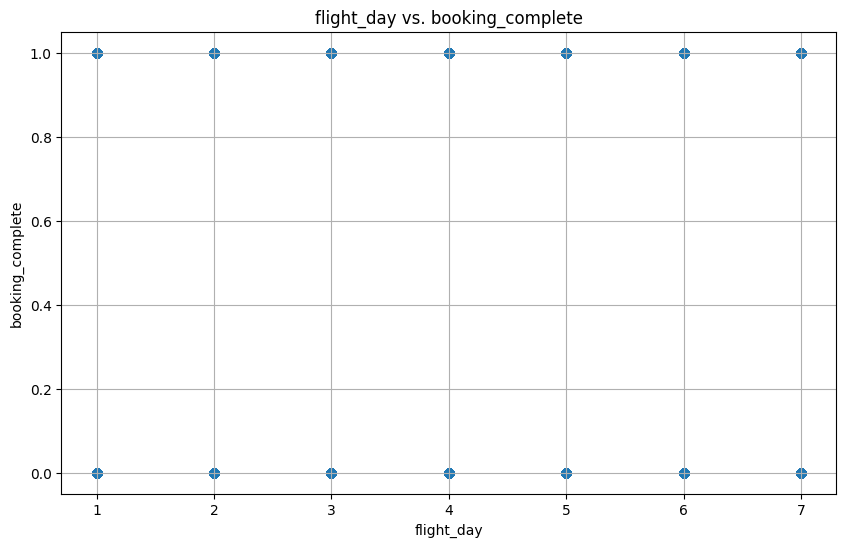

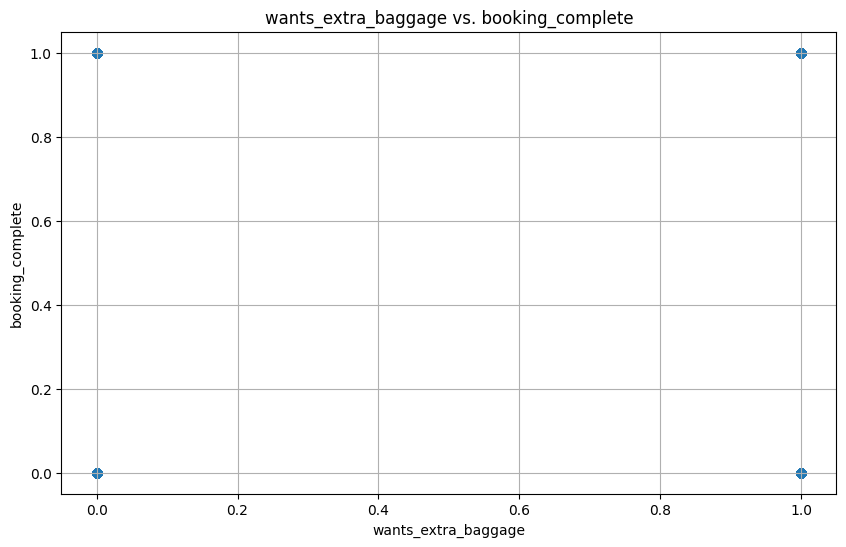

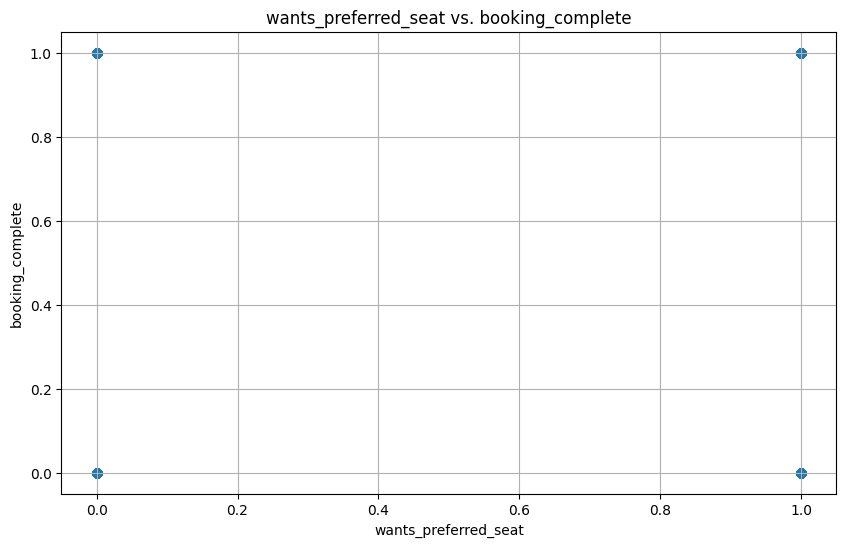

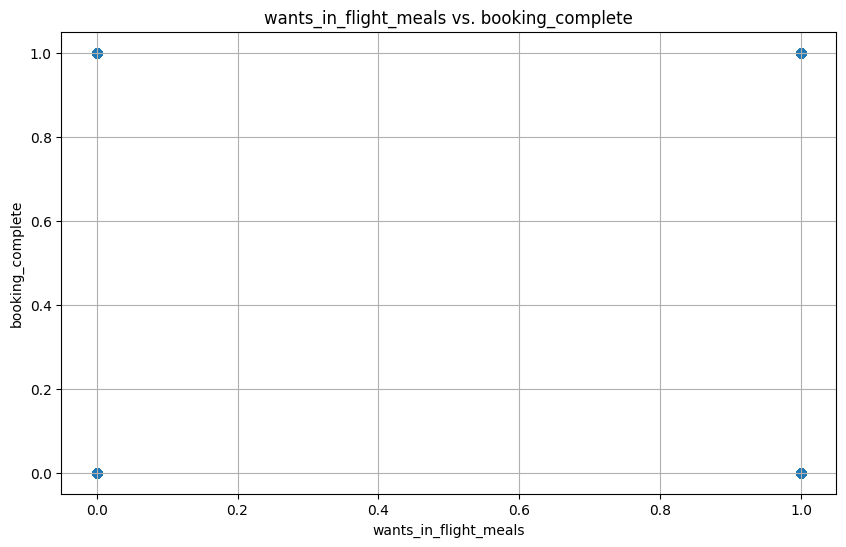

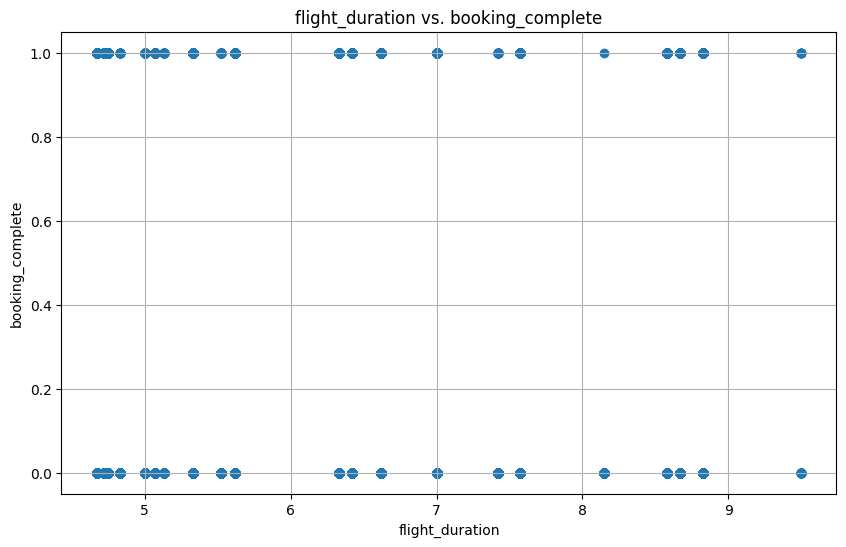

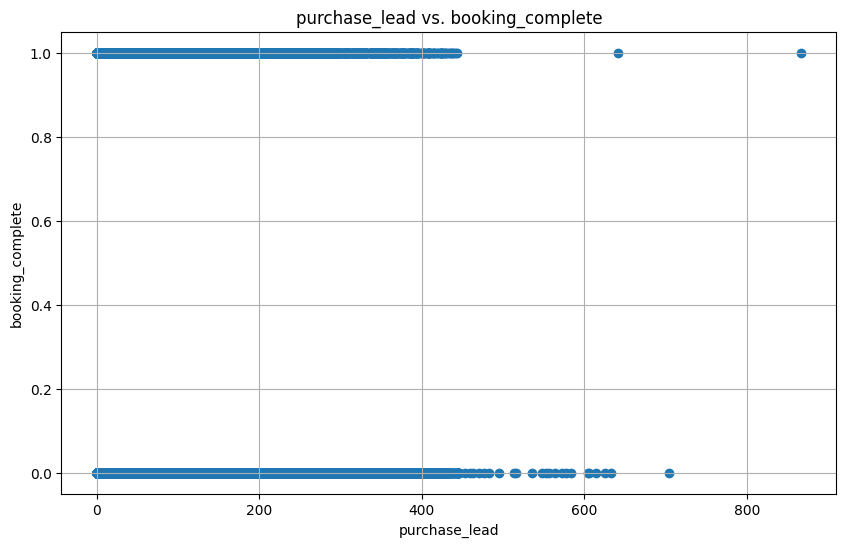

In [42]:
# Create scatter plots for individual features
features = ["num_passengers", "sales_channel_coded", "trip_type", "length_of_stay", "flight_hour", "flight_day", "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "flight_duration", "purchase_lead"]
target = "booking_complete"

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=1)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs. {target}")
    plt.grid()
    plt.show()

# Visualizing the Impact of Trip Type on Booking Completion

In this section, we visualize the impact of trip type on the "booking_complete" target variable using a bar plot.

## Importing Matplotlib
```python
import matplotlib.pyplot as plt


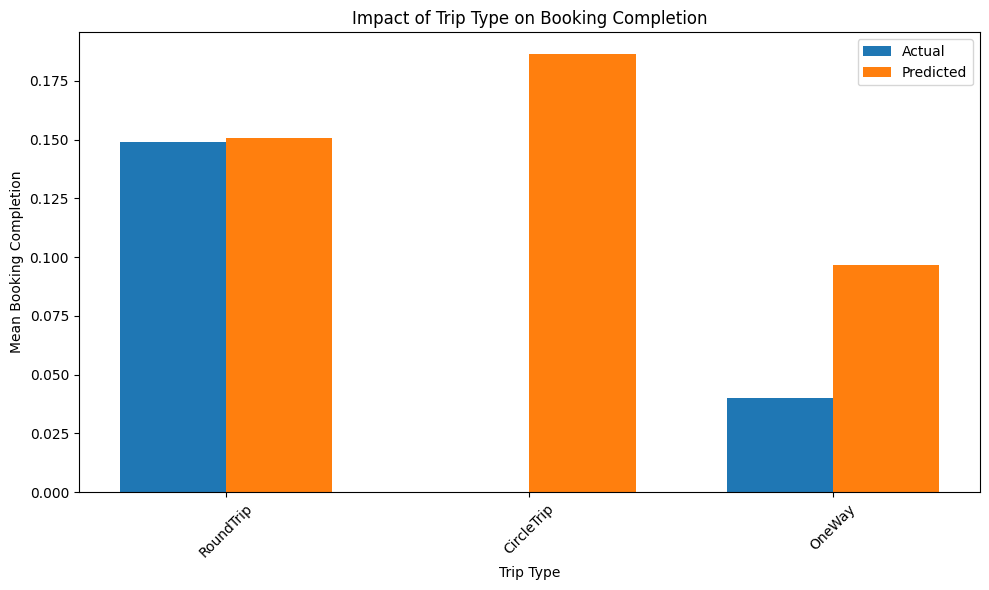

In [48]:
import matplotlib.pyplot as plt

# Convert trip type to numerical values
trip_type_mapping = {"RoundTrip": 0, "CircleTrip": 1, "OneWay": 2}
df['trip_type_coded'] = df['trip_type'].map(trip_type_mapping)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Trip_Type': df.loc[X_test.index, 'trip_type_coded']})

# Group the results by trip type and calculate mean actual and predicted values
results_grouped = results.groupby('Trip_Type').mean().reset_index()

# Create a bar plot to visualize the impact of trip type on booking completion
bar_width = 0.35
x_ticks = results_grouped['Trip_Type']

plt.figure(figsize=(10, 6))

plt.bar(x_ticks - bar_width/2, results_grouped['Actual'], width=bar_width, label='Actual')
plt.bar(x_ticks + bar_width/2, results_grouped['Predicted'], width=bar_width, label='Predicted')

plt.xlabel('Trip Type')
plt.ylabel('Mean Booking Completion')
plt.title('Impact of Trip Type on Booking Completion')
plt.xticks(x_ticks, labels=trip_type_mapping.keys(), rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


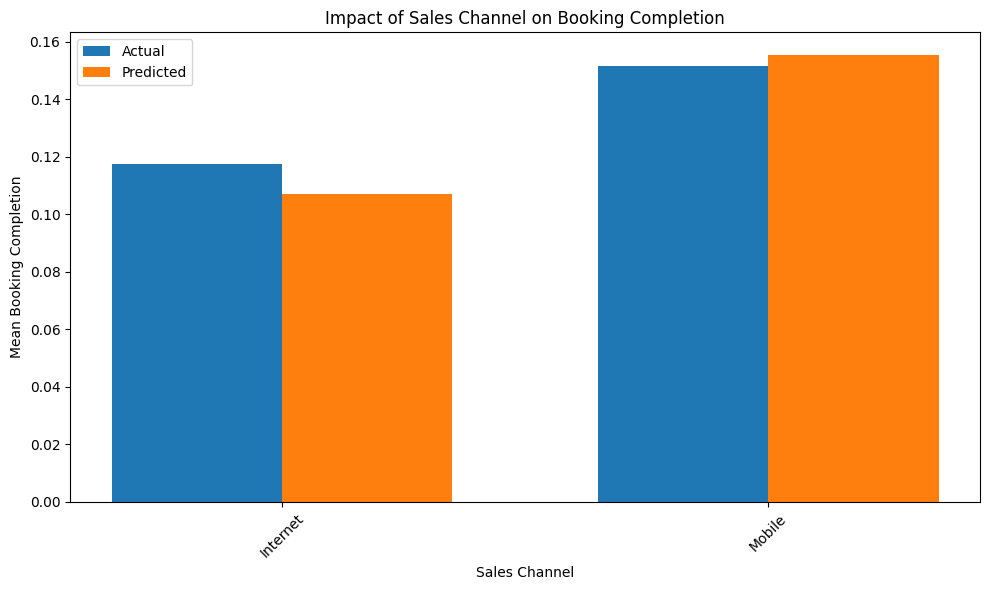

In [52]:
 import matplotlib.pyplot as plt


# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Sales_Channel_coded': df.loc[X_test.index, 'sales_channel_coded']})

# Group the results by sales channel and calculate mean actual and predicted values
results_grouped = results.groupby('Sales_Channel_coded').mean().reset_index()

# Create a bar plot to visualize the impact of sales channel on booking completion
bar_width = 0.35
x_ticks = results_grouped['Sales_Channel_coded']

plt.figure(figsize=(10, 6))

plt.bar(x_ticks - bar_width/2, results_grouped['Actual'], width=bar_width, label='Actual')
plt.bar(x_ticks + bar_width/2, results_grouped['Predicted'], width=bar_width, label='Predicted')

plt.xlabel('Sales Channel')
plt.ylabel('Mean Booking Completion')
plt.title('Impact of Sales Channel on Booking Completion')
plt.xticks(x_ticks, labels=sales_channel_mapping.keys(), rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


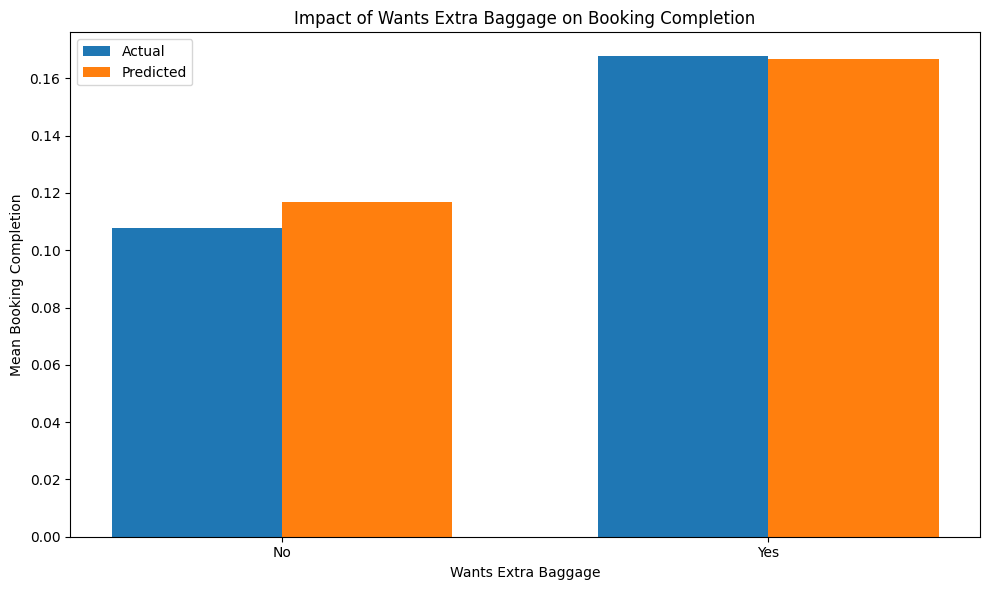

In [53]:
import matplotlib.pyplot as plt

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Wants_Extra_Baggage': df.loc[X_test.index, 'wants_extra_baggage']})

# Group the results by "wants_extra_baggage" and calculate mean actual and predicted values
results_grouped = results.groupby('Wants_Extra_Baggage').mean().reset_index()

# Create a bar plot to visualize the impact of "wants_extra_baggage" on booking completion
bar_width = 0.35
x_ticks = results_grouped['Wants_Extra_Baggage']

plt.figure(figsize=(10, 6))

plt.bar(x_ticks - bar_width/2, results_grouped['Actual'], width=bar_width, label='Actual')
plt.bar(x_ticks + bar_width/2, results_grouped['Predicted'], width=bar_width, label='Predicted')

plt.xlabel('Wants Extra Baggage')
plt.ylabel('Mean Booking Completion')
plt.title('Impact of Wants Extra Baggage on Booking Completion')
plt.xticks(x_ticks, labels=["No", "Yes"], rotation=0)
plt.legend()
plt.tight_layout()

plt.show()


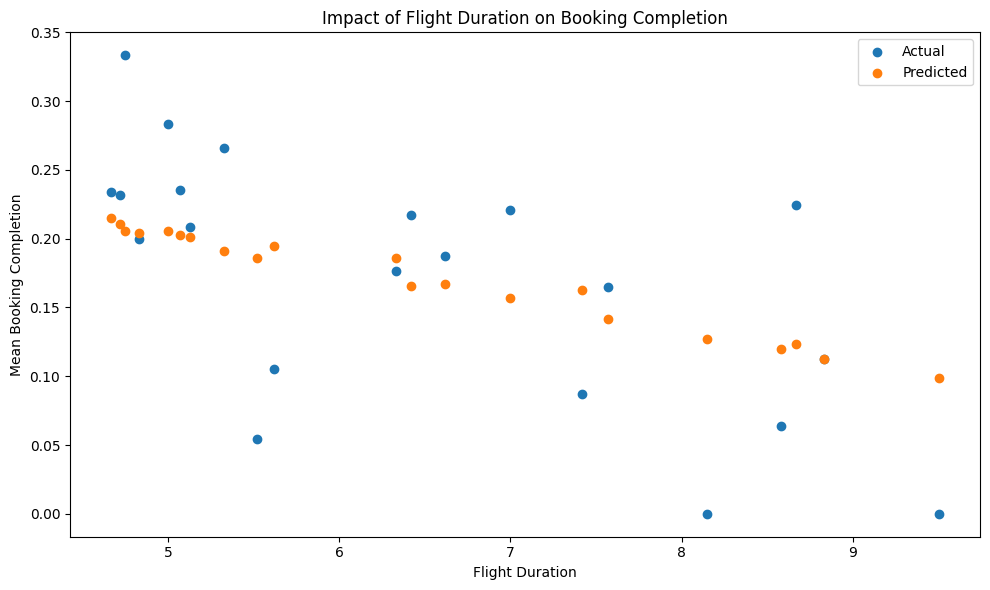

In [54]:
import matplotlib.pyplot as plt

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Flight_Duration': df.loc[X_test.index, 'flight_duration']})

# Group the results by "flight_duration" and calculate mean actual and predicted values
results_grouped = results.groupby('Flight_Duration').mean().reset_index()

# Create a scatter plot to visualize the impact of "flight_duration" on booking completion
plt.figure(figsize=(10, 6))

plt.scatter(results_grouped['Flight_Duration'], results_grouped['Actual'], label='Actual')
plt.scatter(results_grouped['Flight_Duration'], results_grouped['Predicted'], label='Predicted')

plt.xlabel('Flight Duration')
plt.ylabel('Mean Booking Completion')
plt.title('Impact of Flight Duration on Booking Completion')
plt.legend()
plt.tight_layout()

plt.show()
